<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

- Is a first time donor likely to donate bload again?
- Is a donor likely to donate again after a long period without making any donations?
    - What is the size of the period after which donors are less likely to donate bload again?
- Have person donated blood in March 2007?
- Other

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [44]:
#import libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style = 'ticks')

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import *

In [2]:
#read in data
df = pd.read_csv('E:/2021/Data Science/IOD_20211206/DATA/transfusion.data')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [4]:
df.columns = ['recency', 'frequency', 'monetary', 'time', 'donated_mar_2007']
df.head()

,recency,frequency,monetary,time,donated_mar_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
df.shape

(748, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   recency           748 non-null    int64
 1   frequency         748 non-null    int64
 2   monetary          748 non-null    int64
 3   time              748 non-null    int64
 4   donated_mar_2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [10]:
df.isnull().sum()

recency             0
frequency           0
monetary            0
time                0
donated_mar_2007    0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
frequency,748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
monetary,748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
time,748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
donated_mar_2007,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


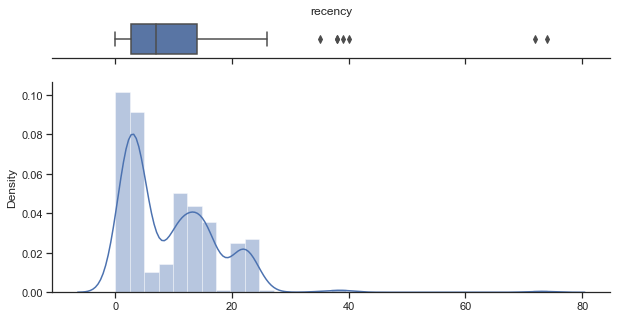

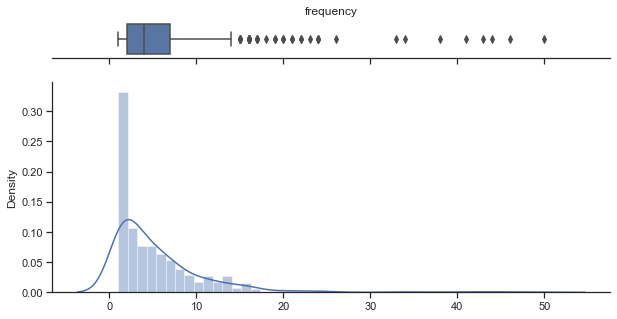

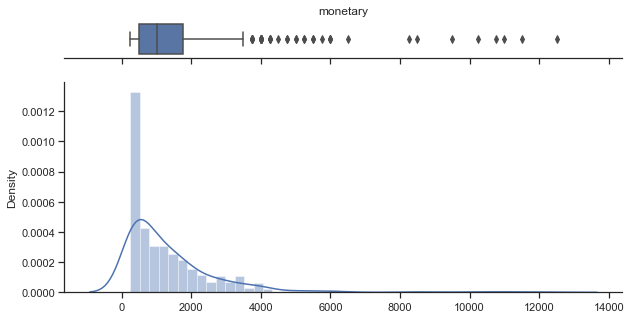

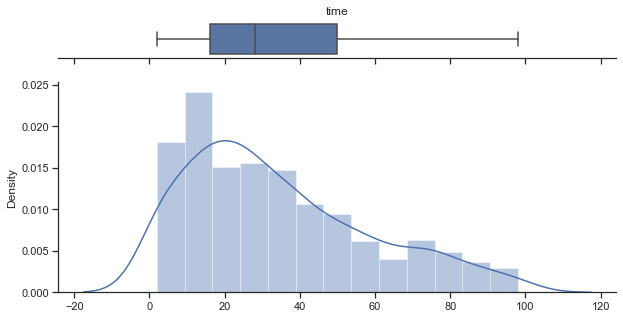

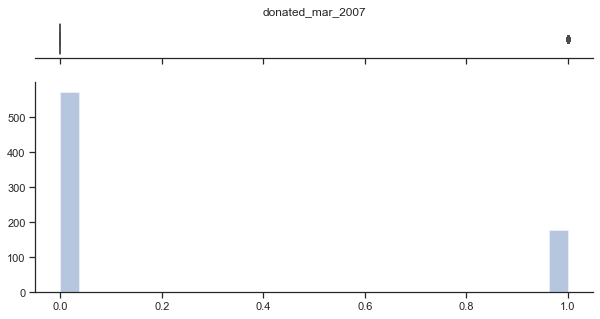

In [14]:
# Check for Outliers
for c in df.columns:
    fig, ax = plt.subplots(2, 
                           figsize = (10, 5),
                           sharex = True, 
                           gridspec_kw = {'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(df[c], ax = ax_box)
    ax_box.set(title = c, yticks = [], xlabel = '')
    sns.despine(ax = ax_box, left = True)
    
    ax_hist = ax[1]
    
    if c == 'donated_mar_2007':       
        ax_hist = sns.distplot(df[c], kde=False, ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
    else:
        ax_hist = sns.distplot(df[c], ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
        

plt.show()

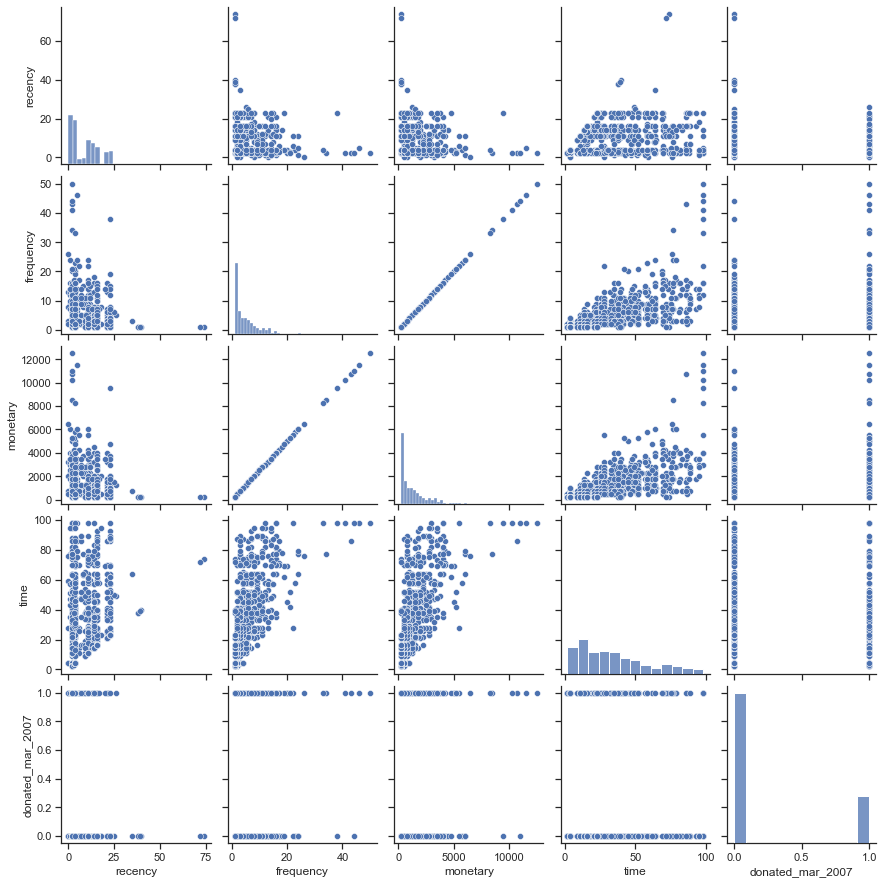

In [17]:
sns.pairplot(df)

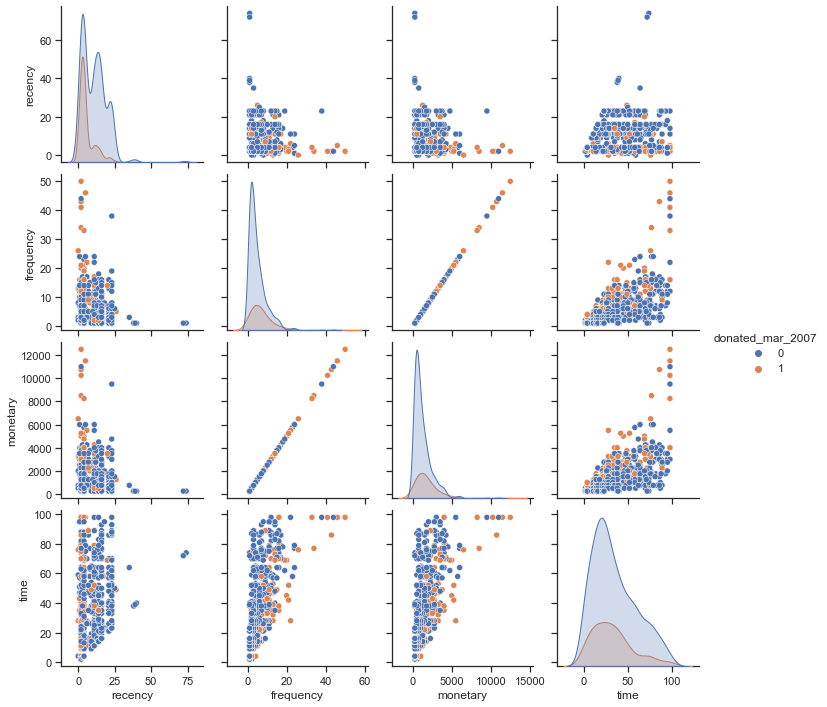

In [16]:
sns.pairplot(df, hue='donated_mar_2007');

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [38]:
features = ['recency', 'frequency', 'time']
outcome = 'donated_mar_2007'
X = df[features]
y = df[outcome]

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [19]:
y.value_counts(normalize=True)

0    0.762032
1    0.237968
Name: donated_mar_2007, dtype: float64

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    )

In [94]:
print(X_train.shape, y_train.shape)

(598, 3) (598,)


In [96]:
#balance the data
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape)

(914, 3) (914,)


In [97]:
y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: donated_mar_2007, dtype: float64

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [98]:
model1 = DecisionTreeClassifier(random_state = 42)

# Step 9: Fit the Model

In [99]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [100]:
train_scores1 = cross_val_score(model1, X_train, y_train, cv = 5)
train_scores1.mean()

0.7582297483936828

In [132]:
model1.score(X_train, y_train)

0.9277899343544858

In [133]:
model1.score(X_test, y_test)
#model may be overfitted because test score is much lower than train score

0.64

In [81]:
def show_summary_report(model):

    actual = y_test
    prediction = model.predict(X_test)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

Accuracy : 0.6400 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.3455 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5135 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5975                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


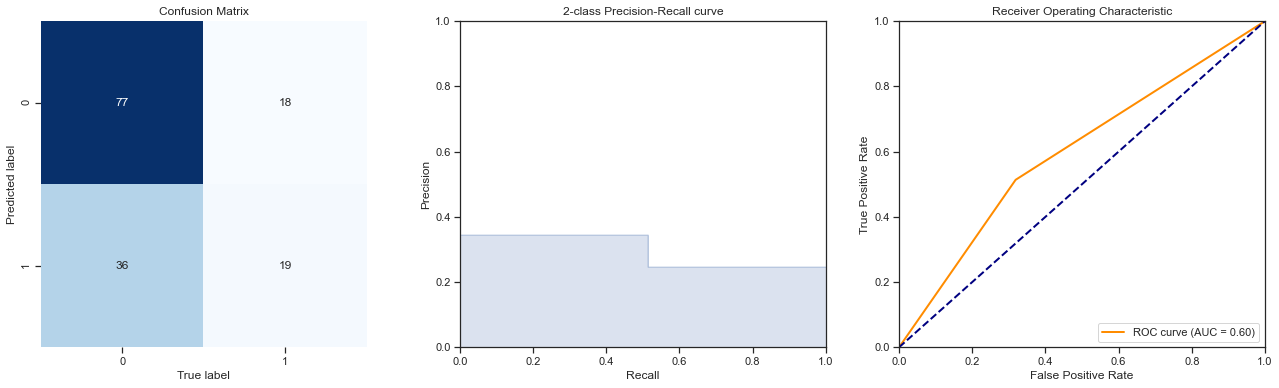

(0.64, 0.34545454545454546, 0.5135135135135135, 0.5974647213585267)

In [101]:
show_summary_report(model1)

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [52]:
#looking or the best hyperparameters
from sklearn.model_selection import GridSearchCV

In [109]:
params= {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5,10,50,100, 200],
    'min_samples_split': [2,5,10,20],
    'min_samples_leaf': [1,2,5],
    'max_features': ['sqrt', 'log2']
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs= -1, cv=5, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 50, 100, 200],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             verbose=1)

In [110]:
best_dt = gs.best_estimator_ #the best decision tree model
print(gs.best_params_)
print(gs.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.7702215816969915


Accuracy : 0.6667 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.3818 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5676 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6333                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


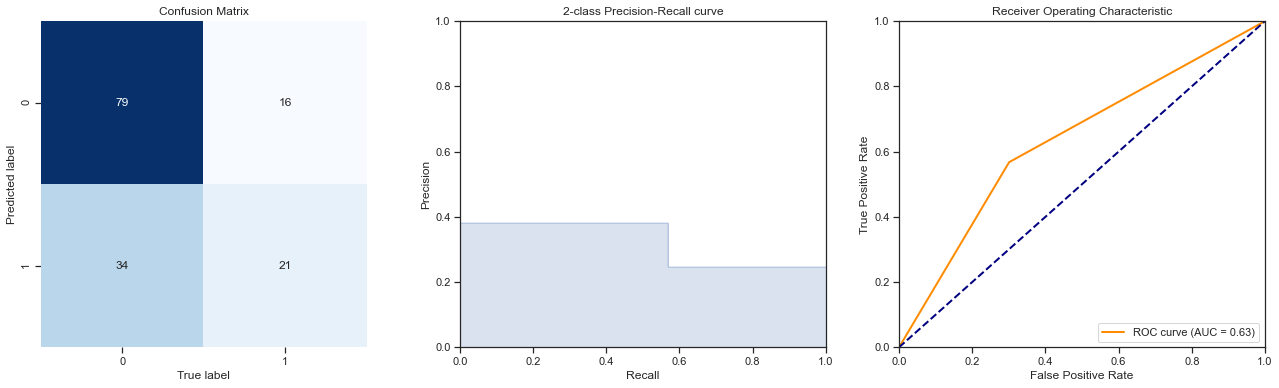

(0.6666666666666666,
 0.38181818181818183,
 0.5675675675675675,
 0.6333413059076776)

In [111]:
show_summary_report(best_dt)

In [139]:
#create dataframe of feature names and their importance
imp_feat = pd.DataFrame(list(zip(X_train.columns, best_dt.feature_importances_)), columns=['Feature', 'Importance'])
imp_feat

,Feature,Importance
0,recency,0.378829
1,frequency,0.195727
2,time,0.425444


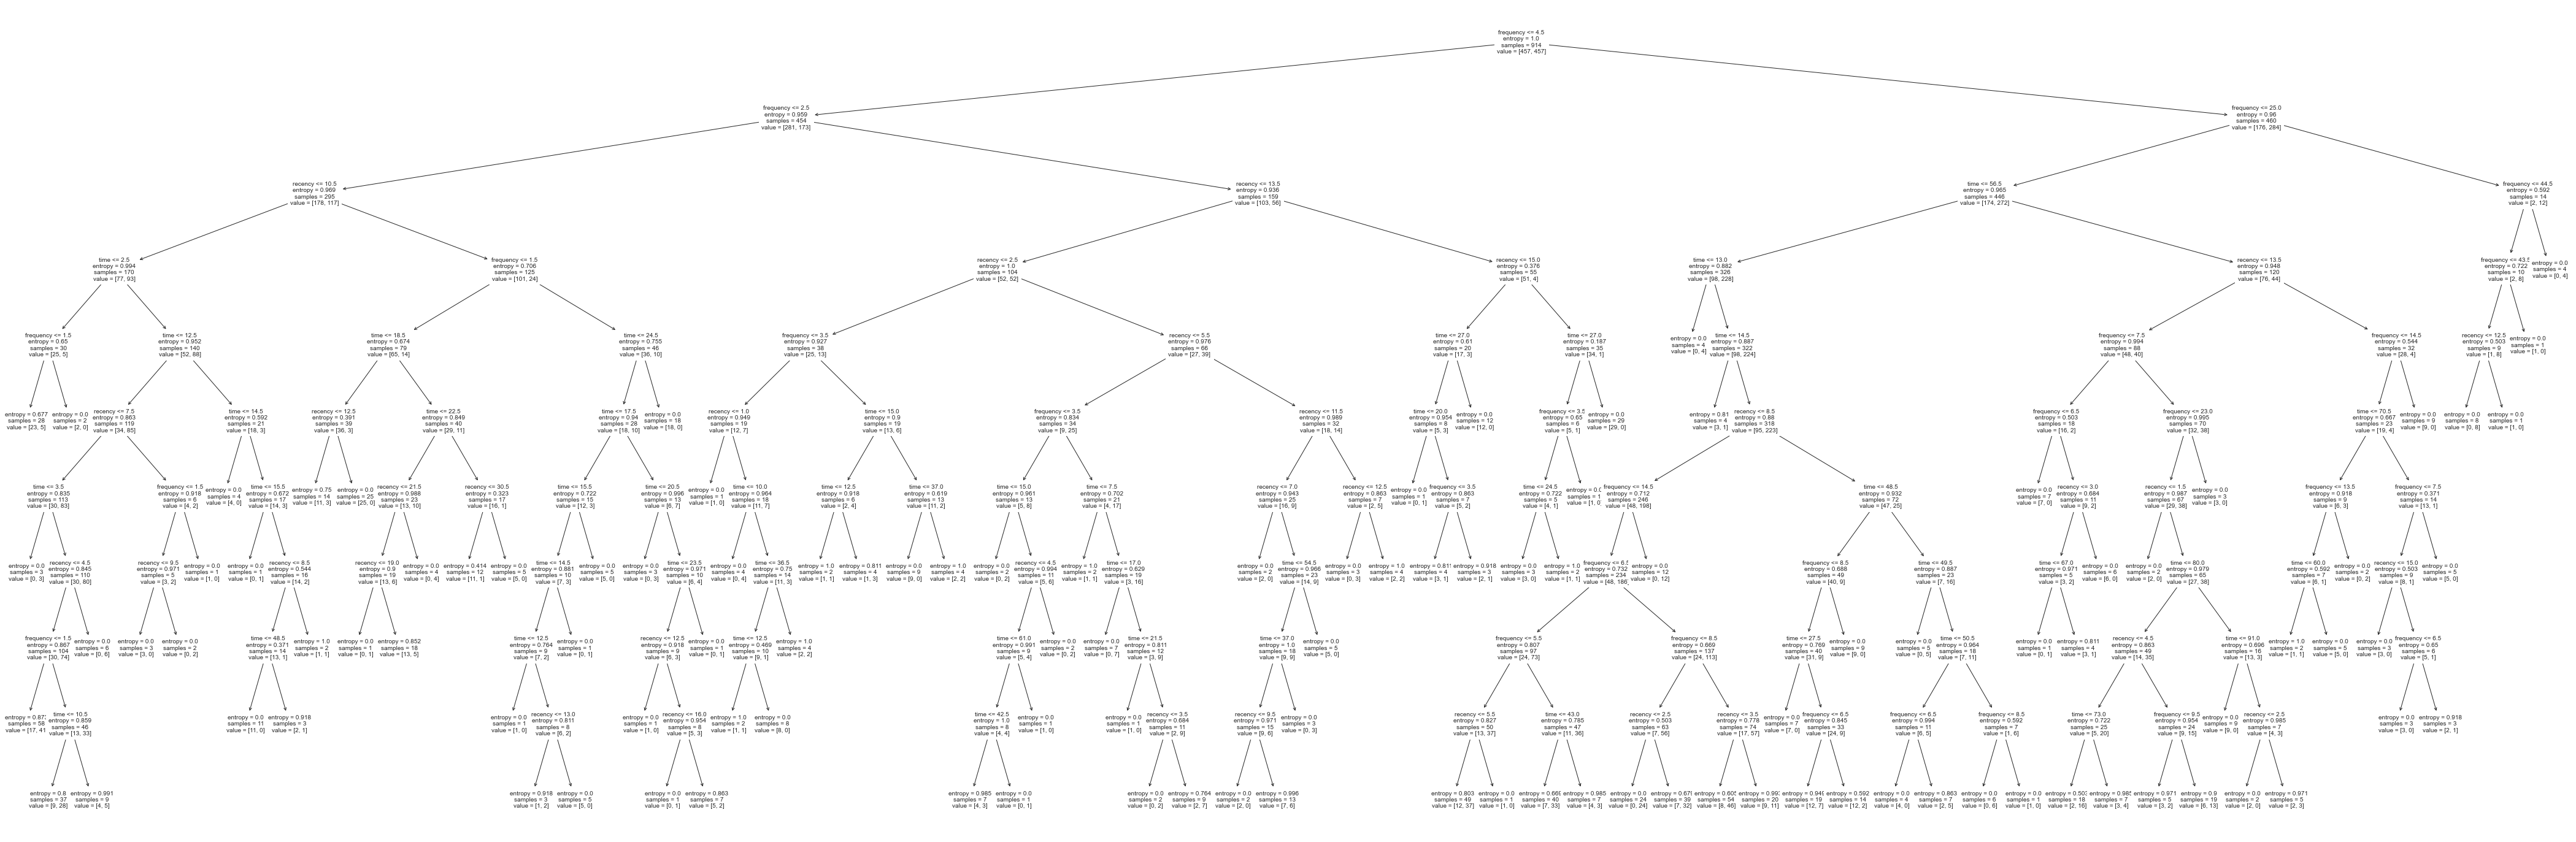

In [142]:
#visualising decision tree
from sklearn import tree
plt.figure(figsize=(75,25))
tree.plot_tree(best_dt, fontsize=10, feature_names = X.columns);

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



